<a href="https://colab.research.google.com/github/anagrd-ai/neural-net-function-solver/blob/main/NN_Function_Solver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training results:
 {'loss': [0.4140903353691101, 0.25562435388565063, 0.2041516900062561, 0.1786544770002365, 0.1631413698196411, 0.1442645639181137, 0.12583832442760468, 0.1038888692855835, 0.08034256100654602, 0.056282222270965576, 0.03675788640975952, 0.021753506734967232, 0.013037770055234432, 0.008232801221311092], 'val_loss': [0.3175794184207916, 0.21814513206481934, 0.18534232676029205, 0.17074815928936005, 0.1541001945734024, 0.13683003187179565, 0.12404422461986542, 0.10146696120500565, 0.06370685994625092, 0.05170673131942749, 0.02651168219745159, 0.022235004231333733, 0.009196490980684757, 0.00557061517611146]} 

200/200 [==============================] - 1s 3ms/step


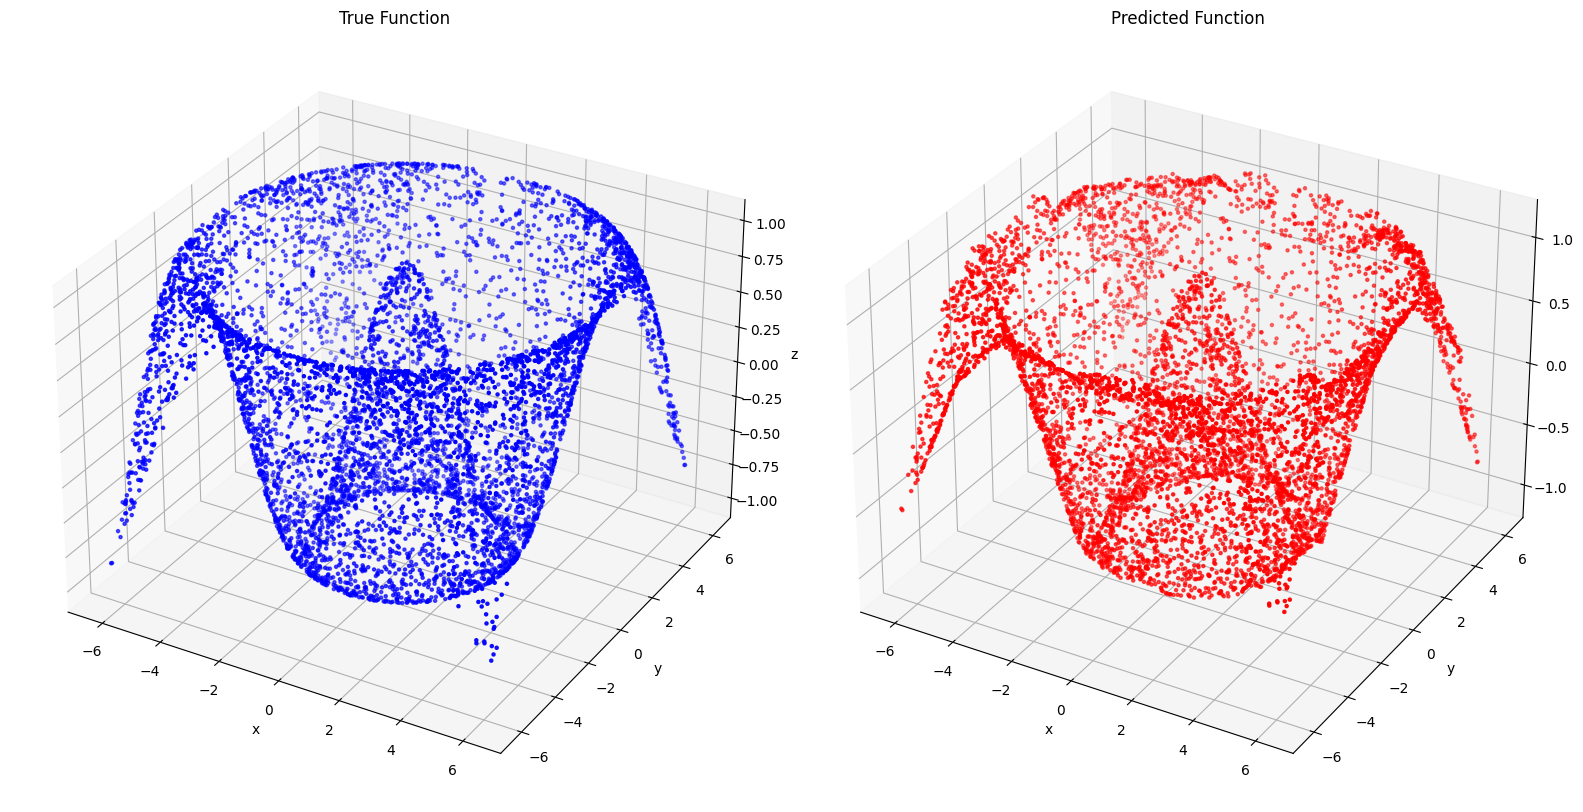

Mean Squared Error: 0.005667666270973331


In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import math
from pprint import pprint

# Generate input (x,y) training data
def generate_xy_data(num_points: int, bounds: float):
    x = np.random.uniform(-bounds, bounds, num_points)
    y = np.random.uniform(-bounds, bounds, num_points)
    return x, y

# Generate output (z) training data
def generate_z_data(x, y):
    z = np.cos(np.sqrt(x * x + y * y))
    # z = np.cos(x * y)
    return z

'''
  Create the neural network model.  Uses regression (Supervised Learning model).

  3 layer Sequential NN model:
  1. 64 nodes, ReLU activation, takes 2 input features (x and y)
    Rectified Linear Unit (ReLU) is handy for non-linear functions. f = max(x,0)
  2. 64 node hidden layer
  3. Output layer with linear activation, returns the z = f(x, y) value
  Optimizer: uses Adam, a stochastic gradient descent optimizer
  Loss function: Mean Squared Error (MSE)
'''
def create_model(
    optimizer='adam', loss='mse', neurons=64, hidden_layer_count = 1):
    layers = [
         tf.keras.layers.Dense(neurons, activation='relu', input_shape=(2,))
        ]
    for _ in range(hidden_layer_count):
      layers.append(tf.keras.layers.Dense(neurons, activation='relu'))
    layers.append(tf.keras.layers.Dense(1))

    model = tf.keras.Sequential(layers)
    model.compile(optimizer=optimizer, loss=loss)
    return model

'''
Train the model
We reserve 20% of the data for validation.
'''
def train_model(model, x_train, y_train, z_train, epochs=14):
    history = model.fit(
        np.column_stack((x_train, y_train)),
        z_train,
        epochs=epochs,
        validation_split=0.2,
        verbose=0
    )
    return history

# Plot the results
def plot_results(x_test, y_test, z_test, z_pred):
    fig = plt.figure(figsize=(16, 8))

    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(x_test, y_test, z_test, c='b', marker=".", label='True')
    ax1.set_title('True Function')

    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(x_test, y_test, z_pred, c='r', marker=".", label='Predicted')
    ax2.set_title('Predicted Function')

    for ax in [ax1, ax2]:
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')

    plt.tight_layout()
    plt.show()

# Main function
def main():
    # Generate data
    x_train, y_train = generate_xy_data(14400, math.pi * 2.0)
    x_test, y_test = generate_xy_data(6400, math.pi * 2.0)

    z_train = generate_z_data(x_train, y_train)
    z_test = generate_z_data(x_test, y_test)

    # Create and train the model
    model = create_model()
    history = train_model(model, x_train, y_train, z_train)

    print("Training results:\n", history.history, "\n")

    # Make predictions
    z_pred = model.predict(np.column_stack((x_test, y_test))).flatten()

    # Plot the results
    plot_results(x_test, y_test, z_test, z_pred)

    # Print the mean squared error
    mse = np.mean((z_test - z_pred)**2)
    print(f"Mean Squared Error: {mse}")

if __name__ == "__main__":
    main()